# <center>Tugas Besar Individu Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Bintan Dinar Artamevia - 1301213227

<b>Url presentasi</b>
https://youtu.be/jUykZxoUuMY

Fungsi yang dikerjakan
- Drop Wave

Range yang digunakan
- [-1,2]

Algoritma yang digunakan
- Firefly Algorithm (FA)
- Artificial Bee Colony Algorithm (ABC)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

![Drop Wave Function](dropwave_function.png)

In [3]:
# Tuliskan fungsi di sini (untuk evaluasi fitness function)
def dropwave(x1, x2):
    numerator = 1 + np.cos(12 * np.sqrt(x1**2 + x2**2))
    denominator = 0.5 * (x1**2 + x2**2) + 2
    return -numerator / denominator

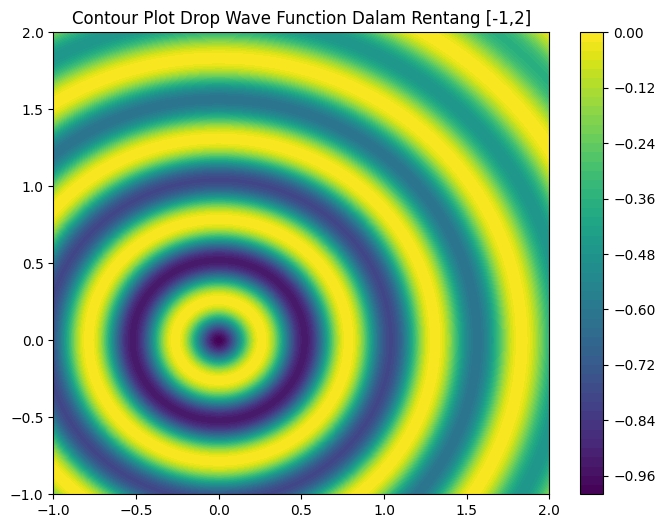

In [19]:
# Plot contour plot di sini berdasarkan range yang diberikan
x1 = np.linspace(-1, 2, 400)
x2 = np.linspace(-1, 2, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = dropwave(X1, X2)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot Drop Wave Function Dalam Rentang [-1,2]')
plt.savefig('contour_plot.png', format='png')
plt.show()

#### Latar Belakang Firefly Algorithm (FA)
Firefly algorithm terinspirasi dari cara kunang-kunang menggunakan cahaya mereka untuk menarik perhatian pasangan. Kunang-kunang akan bergerak menuju kunang-kunang lain yang cahayanya lebih terang daripada dirinya. Intensitas cahaya ini akan menurun apabila jarak antar kunang-kunangnya makin jauh. Untuk cara kerjanya, yang pertama kali dilakukan adalah inisialisasi populasi secara acak. Kemudian, hitung intensitas cahaya (fitness) tiap kunang-kunang. Dalam kasus ini, nilai fitness dihitung menggunakan fungsi drop wave. Lalu untuk tiap pasangan kunang-kunang, akan dibandingkan nilai fitnessnya. Jika kunang-kunang j memiliki nilai fitness yang lebih rendah dibandingkan dengan kunang-kunang i, maka kunang-kunang i akan bergerak menuju kunang-kunang j. Setelah semua kunang-kunang bergerak, maka update posisinya dan evaluasi lagi intensitas cahayanya (fitness) berdasarkan posisi yang baru.

In [21]:
def firefly_algorithm(n, max_iter, alpha, beta, gamma):
    #inisialisasi populasi
    fireflies = np.random.uniform(low=-1, high=2, size=(n, 2))
    fitness = np.array([dropwave(f[0], f[1]) for f in fireflies])
    firefly_positions = [fireflies.copy()]

    #hitung nilai fungsi drop wave tiap kunang-kunang
    for t in range(max_iter):
        for i in range(n):
            for j in range(n):
                if fitness[j] < fitness[i]:
                    r = np.linalg.norm(fireflies[i] - fireflies[j])
                    fireflies[i] += beta * np.exp(-gamma * r**2) * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(2) - 0.5)
                    fireflies[i] = np.clip(fireflies[i], -1, 2)
                    fitness[i] = dropwave(fireflies[i][0], fireflies[i][1])
        firefly_positions.append(fireflies.copy())

    return firefly_positions

#### Latar Belakang Artificial Bee Colony Algorithm
Artificial Bee Colony algorithm terinspirasi dari perilaku koloni lebah madu dalam mencari makanan. Dalam algoritma ini, koloni lebah dibagi menjadi tiga, yaitu lebah employee (pekerja), lebah onlooker (pengamat), dan lebah scout (pencari). Lebah employee bertugas untuk mengeksploitasi sumber makanan (solusi) dan mengumpulkan informasi tentang kualitas sumber makanan tersebut. Lebah onlooker bertugas untuk menunggu sarang dan memilih sumber makanan yang disampaikan oleh lebah employee. Sedangkan lebah scout bertugas untuk menggantikan lebah employee untuk mencari sumber makanan baru apabila lebah employee tidak menemukan sumber makanan baru. Untuk cara kerjanya, yang pertama kali dilakukan adalah inisialisasi sumber makanan (solusi) secara acak dan hitung nilai fitness untuk tiap solusi awal. Pada fase lebah employee, tiap lebah employee akan mencari solusi baru di sekitar posisinya saat ini. Apabila nilai fitness solusi baru lebih baik, maka posisi lebah akan diperbarui. Pada fase lebah onlooker, akan dilakukan evaluasi solusi berdasarkan informasi yang telah diberikan oleh lebah employee. Solusi terbaik akan dipilih berdasarkan probabilitasnya. Pada fase lebah scout, apabila solusi tidak membaik setelah beberapa iterasi, maka lebah tersebut akan mencari solusi baru secara acak.

In [5]:
def artificial_bee_colony(n, max_iter, limit):
    bees = np.random.uniform(low=-1, high=2, size=(n, 2))
    fitness = np.array([dropwave(b[0], b[1]) for b in bees])
    trial = np.zeros(n)
    bee_positions = [bees.copy()]

    for t in range(max_iter):
        #fase lebah employee
        for i in range(n):
            k = np.random.randint(n)
            while k == i:
                k = np.random.randint(n)
            phi = np.random.uniform(-1, 1, size=2)
            new_solution = bees[i] + phi * (bees[i] - bees[k])
            new_solution = np.clip(new_solution, -1, 2)
            new_fitness = dropwave(new_solution[0], new_solution[1])
            if new_fitness < fitness[i]:
                bees[i] = new_solution
                fitness[i] = new_fitness
                trial[i] = 0
            else:
                trial[i] += 1
        
        #fase lebah onlooker
        for i in range(n):
            if np.random.rand() < fitness[i] / fitness.sum():
                k = np.random.randint(n)
                while k == i:
                    k = np.random.randint(n)
                phi = np.random.uniform(-1, 1, size=2)
                new_solution = bees[i] + phi * (bees[i] - bees[k])
                new_solution = np.clip(new_solution, -1, 2)
                new_fitness = dropwave(new_solution[0], new_solution[1])
                if new_fitness < fitness[i]:
                    bees[i] = new_solution
                    fitness[i] = new_fitness
                    trial[i] = 0
                else:
                    trial[i] += 1

        #fase lebah scout
        for i in range(n):
            if trial[i] > limit:
                bees[i] = np.random.uniform(low=-1, high=2, size=2)
                fitness[i] = dropwave(bees[i][0], bees[i][1])
                trial[i] = 0

        bee_positions.append(bees.copy())

    return bee_positions



#### Running Firefly Algorithm
Parameter yang digunakan:
- n: Jumlah kunang-kunang
- max_iter: jumlah iterasi maksimal
- alpha: keacakan (randomness) pada gerakan kuanng-kunang
- beta: daya tarik kunang-kunang (attractiveness)
- gamma: skala tingkat penurunan daya tarik berdasarkan jarak antara kunang-kunang (menentukan seberapa cepat daya tarik menurun dengan meningkatnya jarak)

- n = 50
- max_iter = 200
- Alpha atau randomness yang digunakan bernilai 0.2. Nilai alpha yang kecil membuat langkah acak menjadi kecil sehingga kunang-kunang lebih fokus pada eksploitasi dibandingkan eksplorasi. 
- Nilai beta atau attractiveness yang digunakan bernilai 0.2 dengan alasan nilai beta yang kecil membuat daya tarik antar kunang-kunang tidak terlalu besar sehingga pergerakan kunang-kunang menuju satu sama lain lebih lambat. Hal ini mencegah kunang-kunang dari terlalu cepat berkumpul ke satu titik dan memungkinkan pencarian yang lebih menyebar. 
- Nilai gama atau penurunan daya tarik berdasarkan jarak yang digunakan adalah 0.5. Hal ini berarti daya tarik menurun cukup cepat seiring dengan meningkatnya jarak antara dua kunang-kunang. Hal ini membantu untuk menjaga keseimbangan antara eksplorasi dan eksploitasi sehingga kunang-kunang bisa mencari solusi yang baik di berbagai daerah dalam ruang pencarian.

In [65]:
firefly_positions = firefly_algorithm(n=50, max_iter=200, alpha=0.2, beta=0.2, gamma=0.5)

In [ ]:
x1_fa = np.linspace(-1, 2, 100)
x2_fa = np.linspace(-1, 2, 100)
X1_FA, X2_FA = np.meshgrid(x1_fa, x2_fa)
Z_FA = dropwave(X1_FA, X2_FA)

fig, ax = plt.subplots()
contour = ax.contourf(X1_FA, X2_FA, Z_FA, levels=50, cmap='viridis')
fireflies_plot, = ax.plot([], [], 'ko')

In [58]:
def init_fireflies():
    fireflies_plot.set_data([], [])
    return fireflies_plot,

In [59]:
def update_fireflies(frame):
    fireflies_plot.set_data(frame[:, 0], frame[:, 1])
    return fireflies_plot,

In [66]:
# Plot hasil running algoritma 1 secara interaktif
ani = FuncAnimation(fig, update_fireflies, frames=firefly_positions, init_func=init_fireflies, blit=True, repeat=False)
ani.save("fa_algorithm.gif", writer='imagemagick')
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


#### Running Artificial Bee Colony Algorithm
- n: jumlah total lebah
- max_iter: jumlah iterasi maksimum
- limit: batas percobaan untuk lebah pencari

- n = 150 lebah (dibagi dalam tiga koloni), jumlah ini digunakan karena semakin besar populasinya maka semakin besar pula peluang untuk menemukan solusi optimal
- max_iter = iterasi yang digunakan adalah 500 kali iterasi, karena iterasi 500 memberikan waktu yang cukup untuk mengeksplorasi dan eksplotiasi ruang solusi
- limit = batas percobaan untuk lebah scout sebanyak 200 karena tingginya limit menyebabkan tingginya fleksibilitas pada lebah untuk tetap mengeksplorasi solusi

In [17]:
bee_positions = artificial_bee_colony(n=150, max_iter=500, limit=200)

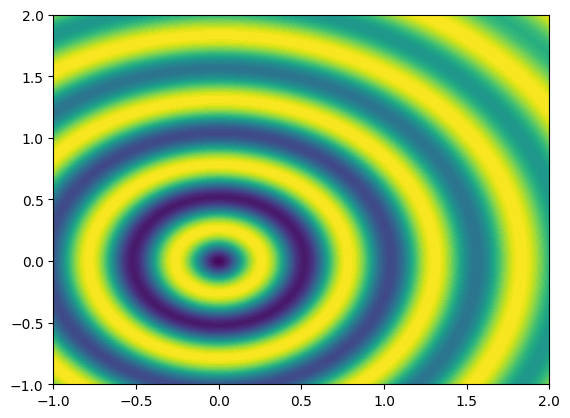

In [15]:
x1_abc = np.linspace(-1, 2, 100)
x2_abc = np.linspace(-1, 2, 100)
X1_ABC, X2_ABC = np.meshgrid(x1_abc, x2_abc)
Z_ABC = dropwave(X1_ABC, X2_ABC)

fig, ax = plt.subplots()
contour = ax.contourf(X1_ABC, X2_ABC, Z_ABC, levels=50, cmap='viridis')
bees_plot, = ax.plot([], [], 'ko')

In [7]:
def init():
    bees_plot.set_data([], [])
    return bees_plot,

In [8]:
def update(frame):
    bees_plot.set_data(frame[:, 0], frame[:, 1])
    return bees_plot,

In [18]:
# Plot hasil running algoritma 2 secara interaktif
anim = FuncAnimation(fig, update, frames=bee_positions, init_func=init, blit=True, repeat=False)
anim.save("abc_algorithm.gif", writer='imagemagick')
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


#### Hasil dan Analisis
Berdasarkan plot yang dihasilkan dari kedua algoritma tersebut, algoritma firefly lebih baik dalam mencari nilai minimum dibandingkan dengan algoritma artificial bee colony.  Titik pada plot yang menggunakan algoritma firefly berhasil mencapai ke titik minimum global dan tidak terjebak pada titik minimum lokal seperti pada algoritma artificial bee colony. Hal tersebut disebabkan oleh parameter alpha (randomness) pada algoritma firefly sehingga dapat menghindari nilai lokal minimum. Selain itu, walaupun algoritma firefly menggunakan jumlah iterasi yang lebih sedikit (200 iterasi) dibandingkan dengan algoritma abc (500 iterasi), algoritma firefly dapat berkonvergensi lebih cepat ke nilai solusi optimum karena algoritmanya yang selalu tertarik menuju ke firefly yang lebih baik. 

#### Kesimpulan
Algoritma FA lebih baik dalam eksploitasi solusi titik minimum dari fungsi drop wave dalam rentang [-1,2]